### Sentimental Analysis 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None) #for displaying maximum columns 

In [4]:
df=pd.read_csv(r"E:\Imarticus\Nikita Ma'am\Hierarchical Clustering\google_review_ratings.csv", index_col=0)
df.head()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
User,,,,,,,,,,,,,,,,,,,,,,,,,
User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [5]:
df.shape

(5456, 25)

In [6]:
df.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000,2.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,2.078339,2.125511,2.190861,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560755,1.810000
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,1.249208,1.406542,1.576686,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171756,1.088944
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,0.780000,0.770000,0.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.040000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,1.290000,1.190000,1.030000,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000,1.425000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,1.690000,1.610000,1.490000,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000,1.810000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,2.285000,2.360000,2.740000,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000,2.195000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.580000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5456 entries, User 1 to User 5456
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Category 1   5456 non-null   float64
 1   Category 2   5456 non-null   float64
 2   Category 3   5456 non-null   float64
 3   Category 4   5456 non-null   float64
 4   Category 5   5456 non-null   float64
 5   Category 6   5456 non-null   float64
 6   Category 7   5456 non-null   float64
 7   Category 8   5456 non-null   float64
 8   Category 9   5456 non-null   float64
 9   Category 10  5456 non-null   float64
 10  Category 11  5456 non-null   object 
 11  Category 12  5455 non-null   float64
 12  Category 13  5456 non-null   float64
 13  Category 14  5456 non-null   float64
 14  Category 15  5456 non-null   float64
 15  Category 16  5456 non-null   float64
 16  Category 17  5456 non-null   float64
 17  Category 18  5456 non-null   float64
 18  Category 19  5456 non-null   float64
 19  C

In [8]:
#dropping last column since there are only 2 entries and other all are missing
df.drop('Unnamed: 25', axis=1,inplace=True)
df.head()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
User,,,,,,,,,,,,,,,,,,,,,,,,
User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [9]:
df.isnull().sum()

Category 1     0
Category 2     0
Category 3     0
Category 4     0
Category 5     0
Category 6     0
Category 7     0
Category 8     0
Category 9     0
Category 10    0
Category 11    0
Category 12    1
Category 13    0
Category 14    0
Category 15    0
Category 16    0
Category 17    0
Category 18    0
Category 19    0
Category 20    0
Category 21    0
Category 22    0
Category 23    0
Category 24    1
dtype: int64

In [10]:
#dropping missing data since their are only 2 rows 
df=df.dropna()

In [11]:
df.shape

(5454, 24)

In [12]:
df.dtypes

Category 1     float64
Category 2     float64
Category 3     float64
Category 4     float64
Category 5     float64
Category 6     float64
Category 7     float64
Category 8     float64
Category 9     float64
Category 10    float64
Category 11     object
Category 12    float64
Category 13    float64
Category 14    float64
Category 15    float64
Category 16    float64
Category 17    float64
Category 18    float64
Category 19    float64
Category 20    float64
Category 21    float64
Category 22    float64
Category 23    float64
Category 24    float64
dtype: object

In [15]:
#type casting from object to float since the data which we dropping was having space so 
#it has considered as object so now we are just type casting
df['Category 11']=df['Category 11'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5454 entries, User 1 to User 5456
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Category 1   5454 non-null   float64
 1   Category 2   5454 non-null   float64
 2   Category 3   5454 non-null   float64
 3   Category 4   5454 non-null   float64
 4   Category 5   5454 non-null   float64
 5   Category 6   5454 non-null   float64
 6   Category 7   5454 non-null   float64
 7   Category 8   5454 non-null   float64
 8   Category 9   5454 non-null   float64
 9   Category 10  5454 non-null   float64
 10  Category 11  5454 non-null   float64
 11  Category 12  5454 non-null   float64
 12  Category 13  5454 non-null   float64
 13  Category 14  5454 non-null   float64
 14  Category 15  5454 non-null   float64
 15  Category 16  5454 non-null   float64
 16  Category 17  5454 non-null   float64
 17  Category 18  5454 non-null   float64
 18  Category 19  5454 non-null   float64
 19  C

In [16]:
df.duplicated().sum()

3

In [17]:
#dropping duplicates since there are are only 3 records and it will not affect the data
df.drop_duplicates(inplace=True)

In [18]:
df.shape

(5451, 24)

In [19]:
df.columns= [ 'churches', 'resorts', 'beaches', 'parks', 
                'theatres', 'museums', 'malls', 'zoo', 'restaurants', 
                'pubs_bars', 'local_services', 'burger_pizza_shops', 
                'hotels_other_lodgings', 'juice_bars', 'art_galleries', 
                'dance_clubs', 'swimming_pools', 'gyms', 'bakeries', 
                'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens']

In [20]:
df.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
User,,,,,,,,,,,,,,,,,,,,,,,,
User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.70,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 6,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.63,2.33,2.65,1.71,1.69,1.69,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [21]:
df.describe()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
count,5451.000000,5451.000000,5451.000000,5451.000000,5451.000000,5451.000000,5451.000000,5451.000000,5451.000000,5451.000000,5451.000000,5451.000000,5451.000000,5451.000000,5451.000000,5451.000000,5451.000000,5451.000000,5451.000000,5451.000000,5451.000000,5451.000000,5451.000000,5451.000000
mean,1.456353,2.321123,2.488580,2.797112,2.958437,2.893300,3.351214,2.541482,3.127004,2.832352,2.549184,2.077999,2.125443,2.190083,2.205793,1.192779,0.949633,0.822060,0.969523,1.000176,0.965806,1.750116,1.531704,1.561238
std,0.827472,1.421176,1.247208,1.309352,1.338420,1.281983,1.413100,1.111569,1.356976,1.307326,1.381390,1.249012,1.406508,1.576454,1.715881,1.107408,0.973789,0.946455,1.203125,1.193227,0.928305,1.597876,1.316198,1.171704
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.110000,1.120000,0.860000,0.840000,0.810000,0.780000,0.780000,0.770000,0.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.790000,1.930000,1.620000,1.800000,1.640000,1.580000,1.290000,1.190000,1.030000,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.910000,2.060000,2.460000,2.670000,2.680000,3.230000,2.170000,2.800000,2.680000,2.000000,1.690000,1.610000,1.490000,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.690000,2.740000,4.100000,4.310000,3.835000,5.000000,3.190000,5.000000,3.525000,3.210000,2.285000,2.360000,2.740000,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


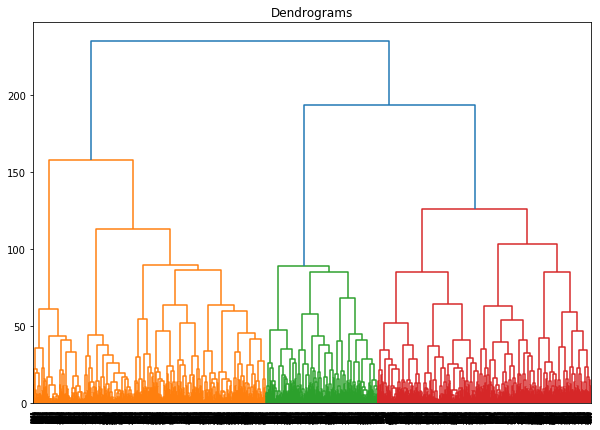

In [22]:
#plotting dendrogram
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward')) #for linkage criterion

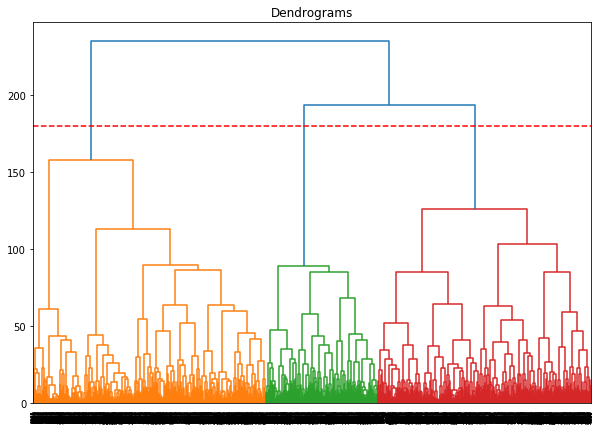

In [23]:
#plotting dendrogram with horizontal cut 
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))
plt.axhline(y=180, color='r', linestyle='--')  #horizontal line to cut dendrogram  having tallest link

In [27]:
#building clustering model
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

y_pred=cluster.fit_predict(df)

In [30]:
df['Clusters']=y_pred
df.head(10)

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,Clusters
User,,,,,,,,,,,,,,,,,,,,,,,,,
User 1,0.0,0.00,3.63,3.65,5.0,2.92,5.00,2.35,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1
User 2,0.0,0.00,3.63,3.65,5.0,2.92,5.00,2.64,2.33,2.65,1.70,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1
User 3,0.0,0.00,3.63,3.63,5.0,2.92,5.00,2.64,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1
User 4,0.0,0.50,3.63,3.63,5.0,2.92,5.00,2.35,2.33,2.64,1.73,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1
User 6,0.0,0.00,3.63,3.63,5.0,2.92,5.00,2.63,2.33,2.65,1.71,1.69,1.69,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1
User 7,0.0,5.00,3.63,3.63,5.0,2.92,3.03,2.35,2.33,2.64,1.73,1.68,1.69,1.71,1.75,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1
User 8,0.0,5.00,3.63,3.63,5.0,2.92,5.00,2.63,2.33,2.64,1.70,1.68,1.69,1.71,1.74,0.60,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1
User 9,0.0,5.00,3.64,3.64,5.0,2.92,3.03,2.62,2.32,2.63,1.71,1.67,1.68,1.70,0.75,0.60,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1
User 10,0.0,5.00,3.64,3.64,5.0,2.92,5.00,2.35,2.32,2.63,1.69,1.67,1.67,1.70,0.74,0.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [31]:
df['Clusters'].value_counts()

0    2277
1    2084
2    1090
Name: Clusters, dtype: int64

In [33]:
#making different dataframes for each cluster kepping in mind that we dont have suject matter expert 
cluster_0_df=df[df['Clusters']==0]
print(cluster_0_df.shape)
cluster_0_df.head()

(2277, 25)


,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,Clusters
User,,,,,,,,,,,,,,,,,,,,,,,,,
User 41,0.54,0.57,0.67,3.71,5.00,2.95,2.94,2.59,1.66,2.27,5.00,1.59,1.58,1.59,1.62,0.70,0.54,0.00,0.0,0.00,0.50,0.00,0.51,0.54,0
User 57,0.69,0.69,0.72,5.00,3.83,2.96,2.94,5.00,2.89,2.16,5.00,1.44,1.43,1.43,1.55,1.56,0.63,0.00,0.0,0.00,0.50,0.63,0.62,0.64,0
User 122,0.73,5.00,1.34,1.33,1.35,1.37,4.11,5.00,5.00,2.30,1.61,1.59,5.00,5.00,0.79,0.78,0.80,0.82,1.1,0.78,0.65,0.65,0.67,0.88,0
User 123,5.00,5.00,5.00,1.33,1.34,1.37,4.15,5.00,2.85,2.76,1.61,1.59,5.00,5.00,0.81,0.78,0.79,0.81,1.1,0.67,0.65,0.64,0.67,0.89,0
User 124,0.73,1.25,1.34,1.33,1.34,4.71,4.12,5.00,5.00,2.76,1.61,1.59,0.84,4.90,0.81,0.78,0.78,0.81,1.1,1.83,0.65,0.64,0.66,0.69,0


**Observation:** from cluster 0 we can see that there are most of the people with low rating that means their reviews will be negative

In [34]:
cluster_1_df=df[df['Clusters']==1]
print(cluster_1_df.shape)
cluster_1_df.head()

(2084, 25)


,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,Clusters
User,,,,,,,,,,,,,,,,,,,,,,,,,
User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1
User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.70,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1
User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1
User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1
User 6,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.63,2.33,2.65,1.71,1.69,1.69,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1


**Observation:** from cluster 1 we can see that there are most of the people with average rating that means their reviews will be neutral

In [35]:
cluster_2_df=df[df['Clusters']==2]
print(cluster_2_df.shape)
cluster_2_df.head()

(1090, 25)


,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,Clusters
User,,,,,,,,,,,,,,,,,,,,,,,,,
User 179,1.50,1.86,1.86,1.71,3.19,4.36,4.55,5.00,5.00,1.67,1.62,1.66,0.92,0.90,0.65,0.52,0.51,0.52,0.53,5.00,1.08,1.32,1.31,1.33,2
User 180,1.42,1.88,1.88,5.00,3.19,4.36,3.97,3.89,5.00,1.65,1.60,1.64,0.90,0.88,0.64,0.51,0.50,0.51,0.61,5.00,1.09,1.34,1.33,1.36,2
User 748,1.57,1.59,1.63,1.90,1.89,1.89,5.00,1.94,2.55,2.17,2.15,2.18,2.47,5.00,1.88,5.00,5.00,5.00,0.52,0.67,1.56,1.55,1.54,1.54,2
User 749,1.57,1.61,1.64,1.90,1.89,1.90,5.00,2.03,2.37,2.16,2.14,2.16,2.46,5.00,1.88,5.00,5.00,4.59,0.00,1.61,1.57,1.56,1.55,1.56,2
User 750,1.58,2.55,2.56,1.90,1.89,1.90,5.00,1.95,2.53,2.14,2.13,2.15,2.45,5.00,5.00,5.00,5.00,4.59,0.00,0.66,1.58,1.57,1.56,1.57,2


**Observation:** from cluster 2 we can see that there are most of the people with high rating that means their reviews will be positive

In [36]:
#re-naming the clusters by using above domain knowledge
df['Clusters']=df['Clusters'].replace({0:'Negative',1:'Neutral',3:'Positive'})

In [37]:
df.head(30)

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,Clusters
User,,,,,,,,,,,,,,,,,,,,,,,,,
User 1,0.0,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.50,0.0,0.5,0.00,0.0,0.0,0.0,0.0,Neutral
User 2,0.0,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,1.70,1.69,1.70,1.72,1.74,0.59,0.50,0.0,0.5,0.00,0.0,0.0,0.0,0.0,Neutral
User 3,0.0,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.50,0.0,0.5,0.00,0.0,0.0,0.0,0.0,Neutral
User 4,0.0,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,1.73,1.69,1.70,1.72,1.74,0.59,0.50,0.0,0.5,0.00,0.0,0.0,0.0,0.0,Neutral
User 6,0.0,0.00,3.63,3.63,5.00,2.92,5.00,2.63,2.33,2.65,1.71,1.69,1.69,1.72,1.74,0.59,0.50,0.0,0.5,0.00,0.0,0.0,0.0,0.0,Neutral
User 7,0.0,5.00,3.63,3.63,5.00,2.92,3.03,2.35,2.33,2.64,1.73,1.68,1.69,1.71,1.75,0.59,0.50,0.0,0.5,0.00,0.0,0.0,0.0,0.0,Neutral
User 8,0.0,5.00,3.63,3.63,5.00,2.92,5.00,2.63,2.33,2.64,1.70,1.68,1.69,1.71,1.74,0.60,0.50,0.0,0.5,0.00,0.0,0.0,0.0,0.0,Neutral
User 9,0.0,5.00,3.64,3.64,5.00,2.92,3.03,2.62,2.32,2.63,1.71,1.67,1.68,1.70,0.75,0.60,0.00,0.0,0.5,0.00,0.0,0.0,0.0,0.0,Neutral
User 10,0.0,5.00,3.64,3.64,5.00,2.92,5.00,2.35,2.32,2.63,1.69,1.67,1.67,1.70,0.74,0.59,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,Neutral
